In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [2]:
data=pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
data.shape

(150, 5)

In [6]:
le=LabelEncoder()
data["species"]=le.fit_transform(data["species"])

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
data["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

<Axes: xlabel='species', ylabel='count'>

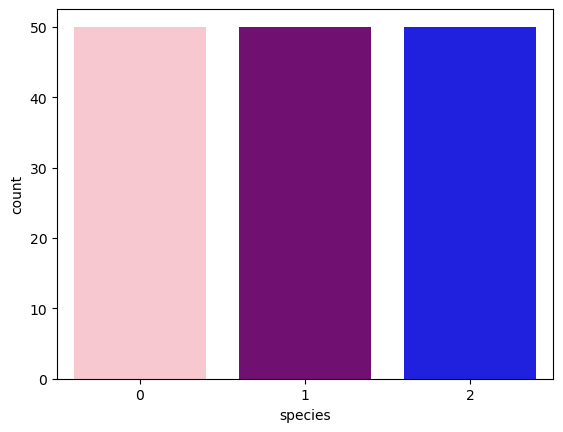

In [10]:
palette_custom = ["pink", "purple", "blue"]
sns.countplot(x="species", data=data, palette=palette_custom)

C:\Users\SWATHY KRISHNA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


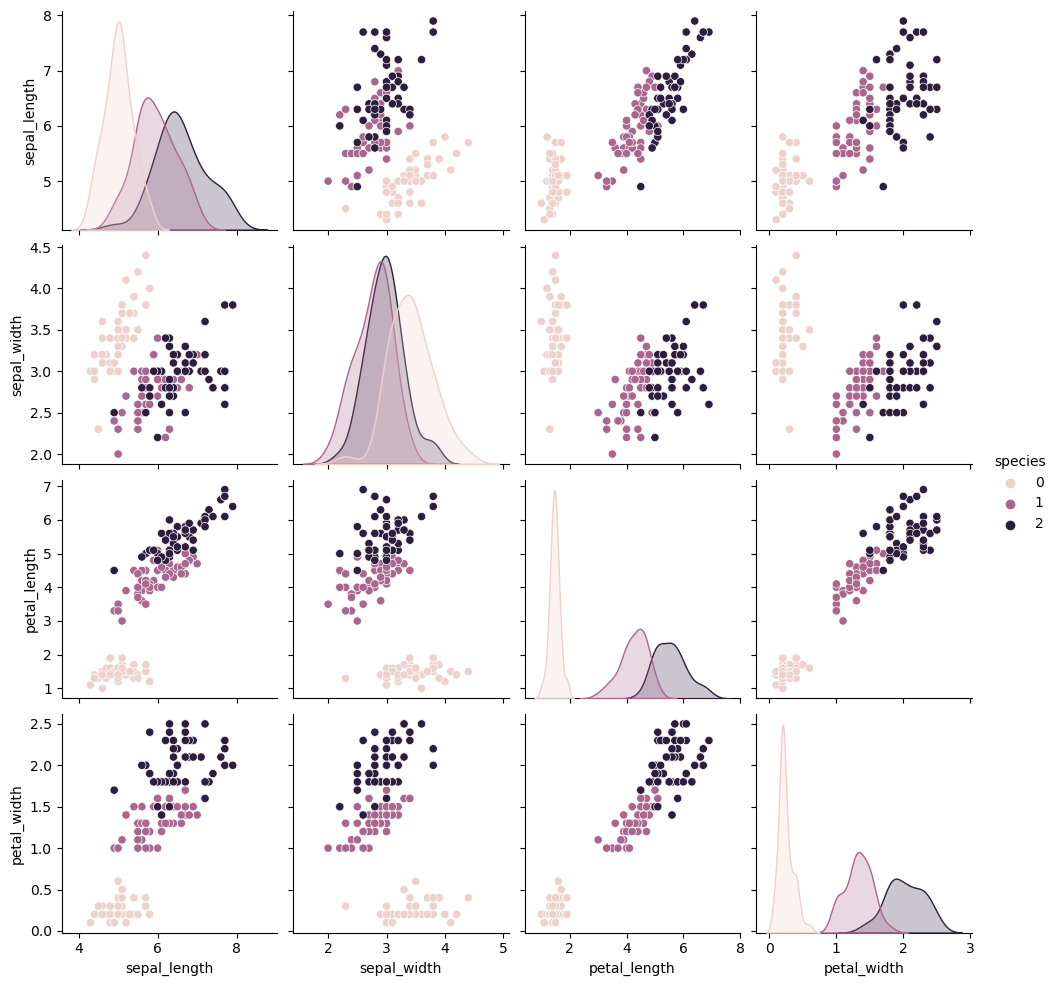

In [11]:
sns.pairplot(data=data,hue="species")

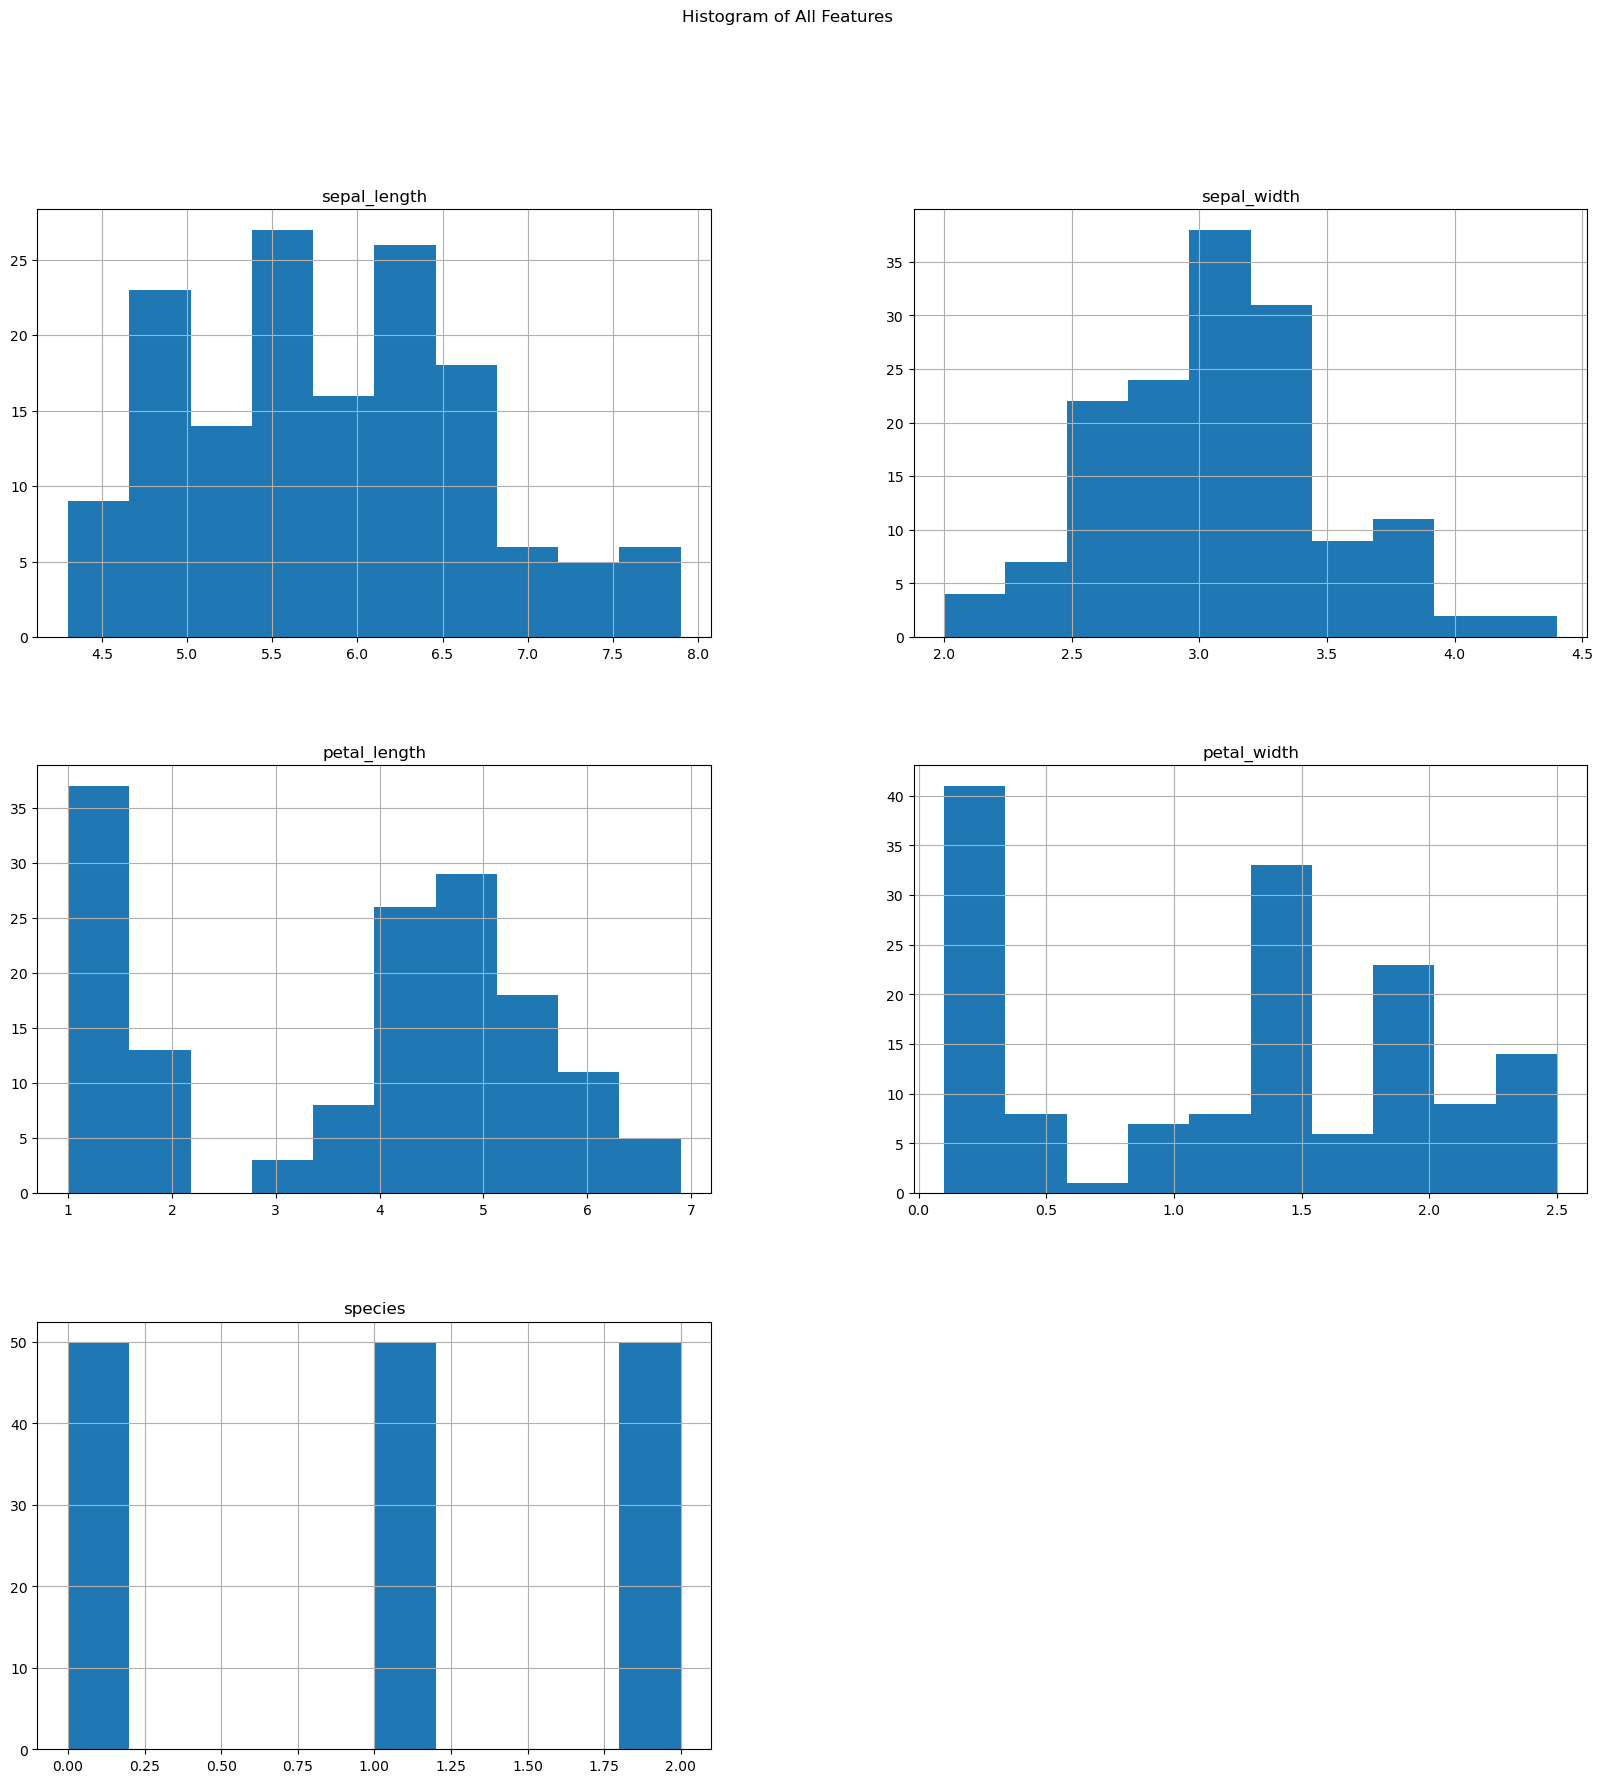

In [12]:
data.hist(figsize=(20, 20))
plt.suptitle("Histogram of All Features")
plt.show()

C:\Users\SWATHY KRISHNA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


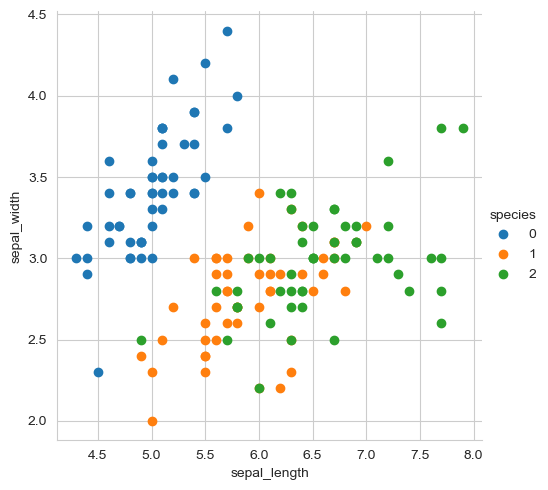

In [13]:
sns.set_style("whitegrid")
g=sns.FacetGrid(data,hue="species",height=5)
g.map(plt.scatter,"sepal_length","sepal_width")
g.add_legend()
plt.show()

C:\Users\SWATHY KRISHNA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


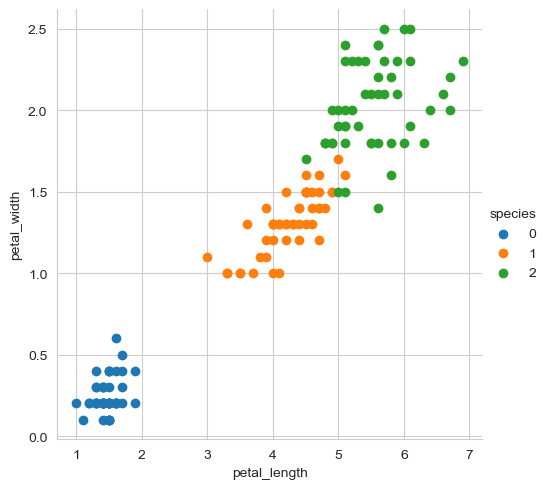

In [14]:
sns.set_style("whitegrid")
g=sns.FacetGrid(data,hue="species",height=5)
g.map(plt.scatter,"petal_length","petal_width")
g.add_legend()
plt.show()

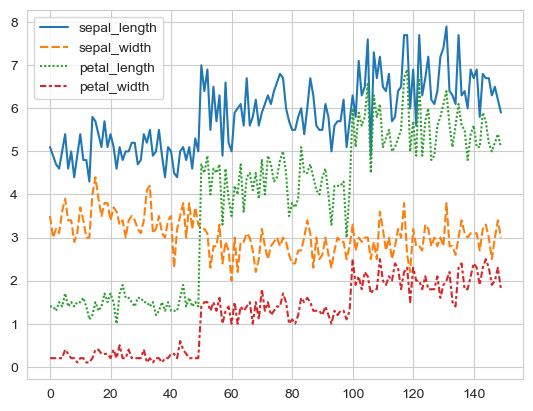

In [15]:
sns.lineplot(data.drop(columns=["species"]))
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [17]:
x=data.drop("species",axis=1)
y=data["species"]

In [18]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [21]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (112, 4)
x_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


In [22]:
scaler=MinMaxScaler()
scaler.fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test)

array([[ 0.05714286,  0.5       ,  0.06779661,  0.04166667],
       [ 0.48571429,  0.33333333,  0.62711864,  0.45833333],
       [ 0.57142857,  0.375     ,  0.55932203,  0.5       ],
       [ 0.8       ,  0.41666667,  0.81355932,  0.625     ],
       [ 0.4       ,  0.29166667,  0.52542373,  0.375     ],
       [ 0.31428571,  0.20833333,  0.50847458,  0.5       ],
       [ 0.68571429,  0.5       ,  0.83050847,  0.91666667],
       [ 0.2       ,  0.70833333,  0.08474576,  0.125     ],
       [ 0.65714286,  0.20833333,  0.81355932,  0.70833333],
       [ 0.11428571,  0.41666667,  0.06779661,  0.        ],
       [ 0.6       ,  0.41666667,  0.71186441,  0.79166667],
       [ 0.68571429,  0.33333333,  0.6440678 ,  0.54166667],
       [ 0.45714286,  0.08333333,  0.6779661 ,  0.58333333],
       [ 0.17142857,  0.5       ,  0.03389831,  0.04166667],
       [ 0.22857143,  0.58333333,  0.06779661,  0.04166667],
       [ 0.94285714,  0.33333333,  0.96610169,  0.79166667],
       [-0.02857143,  0.

In [23]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [24]:
pred_lr=lr.predict(x_test)
pred_lr

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [25]:
print(classification_report(pred_lr,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.82      0.90        17
           2       0.75      1.00      0.86         9

    accuracy                           0.92        38
   macro avg       0.92      0.94      0.92        38
weighted avg       0.94      0.92      0.92        38



In [26]:
print(accuracy_score(y_test,pred_lr))

0.9210526315789473


In [27]:
print(confusion_matrix(y_test,pred_lr))

[[12  0  0]
 [ 0 14  0]
 [ 0  3  9]]


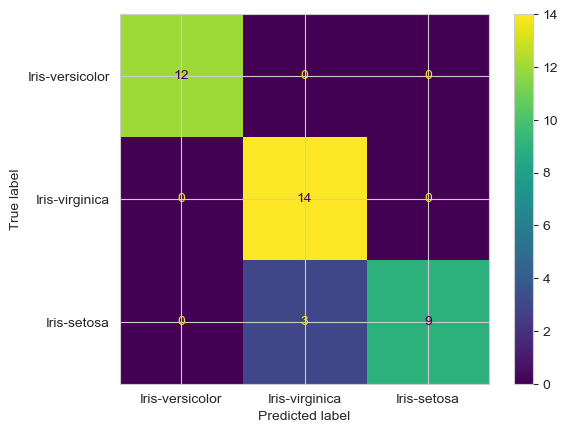

In [28]:
matrix=confusion_matrix(y_test,pred_lr)
labels=["Iris-versicolor","Iris-virginica","Iris-setosa"]
ConfusionMatrixDisplay(matrix,display_labels=labels).plot()

In [29]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [30]:
pred_knn=knn.predict(x_test)
pred_knn

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0])

In [31]:
print(classification_report(pred_knn,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [32]:
print(accuracy_score(y_test,pred_knn))

0.9736842105263158


In [33]:
print(confusion_matrix(y_test,pred_knn))

[[12  0  0]
 [ 0 14  0]
 [ 0  1 11]]


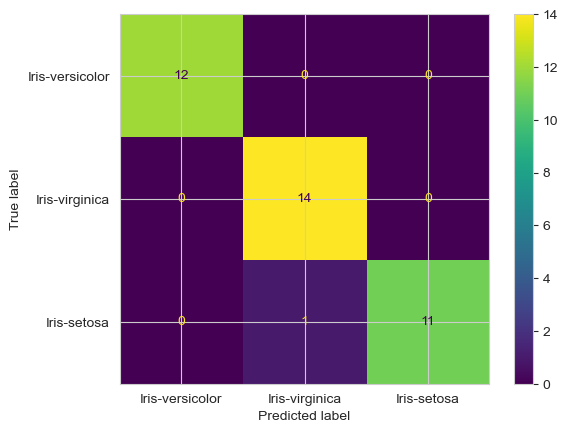

In [34]:
matrix=confusion_matrix(y_test,pred_knn)
labels=["Iris-versicolor","Iris-virginica","Iris-setosa"]
ConfusionMatrixDisplay(matrix,display_labels=labels).plot()

In [35]:
naive=GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [36]:
pred_naive=naive.predict(x_test)
pred_naive

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [37]:
print(classification_report(pred_naive,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.82      0.90        17
           2       0.75      1.00      0.86         9

    accuracy                           0.92        38
   macro avg       0.92      0.94      0.92        38
weighted avg       0.94      0.92      0.92        38



In [38]:
print(accuracy_score(y_test,pred_naive))

0.9210526315789473


In [39]:
print(confusion_matrix(y_test,pred_naive))

[[12  0  0]
 [ 0 14  0]
 [ 0  3  9]]


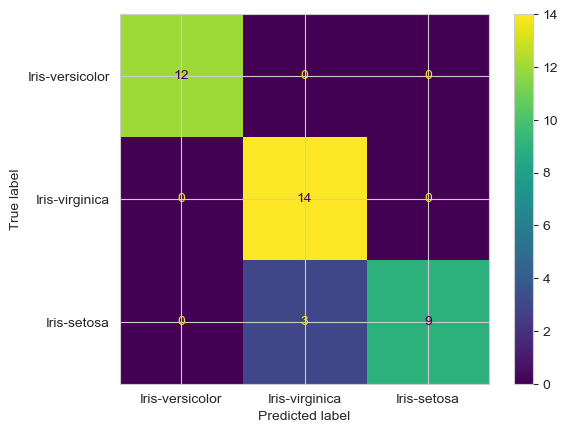

In [40]:
matrix=confusion_matrix(y_test,pred_naive)
labels=["Iris-versicolor","Iris-virginica","Iris-setosa"]
ConfusionMatrixDisplay(matrix,display_labels=labels).plot()

In [41]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [42]:
pred_svc=svc.predict(x_test)
pred_svc

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0])

In [43]:
print(classification_report(pred_svc,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93        16
           2       0.83      1.00      0.91        10

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



In [44]:
print(accuracy_score(y_test,pred_svc))

0.9473684210526315


In [45]:
print(confusion_matrix(y_test,pred_svc))

[[12  0  0]
 [ 0 14  0]
 [ 0  2 10]]


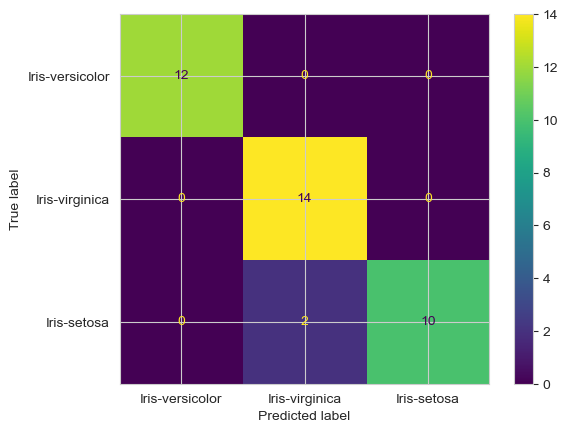

In [46]:
matrix=confusion_matrix(y_test,pred_svc)
labels=["Iris-versicolor","Iris-virginica","Iris-setosa"]
ConfusionMatrixDisplay(matrix,display_labels=labels).plot()

In [47]:
print(knn.predict([[4.5,5.2,1.4,0.3]]))
print(naive.predict([[4.5,5.2,1.4,0.3]]))
print(svc.predict([[4.5,5.2,1.4,0.3]]))

[0]
[0]
[0]


C:\Users\SWATHY KRISHNA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\SWATHY KRISHNA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\SWATHY KRISHNA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [48]:
corr=data.corr()

<Axes: >

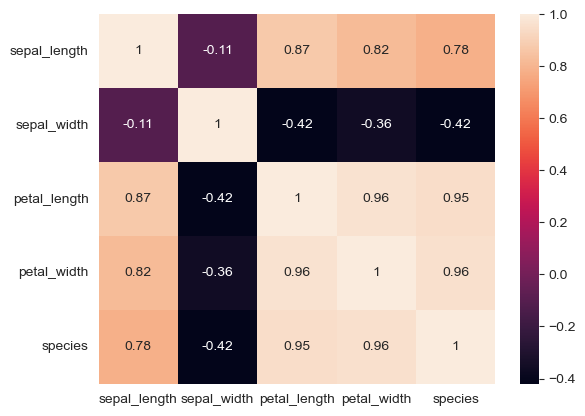

In [49]:
sns.heatmap(corr,annot=True)